## Introdução sobre o Projeto



##### Etapa 1. Pré-Processamento dos Dados

In [101]:
# Importando bibliotecas

import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from scipy.stats import zscore

In [6]:
# Evitar avisos do seaborn

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [7]:
# URL do arquivo XLSX no GitHub
url = 'https://raw.githubusercontent.com/cesarabaraujo/projetoV_ifoodtech/main/Clean_Ads_Data.xlsx'

# Lê o conteúdo do arquivo no Pandas
df_1 = pd.read_excel(url)

In [8]:
# Visualizando as três primeiras linhas
df_1.head(3)

,Timestamp,Date,Hour of Day,Date.1,InventoryType,AD Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2014-09-01-23,2014-09-01,23,Monday,Format1,300x250,Inter228,Video,Mobile,Video,1911,336,334,0,0.0,0.35,0.0,0.0,0.0,0.0
1,2014-09-01-18,2014-09-01,18,Monday,Format7,300x600,Inter218,App,Mobile,Display,1987,325,324,0,0.0,0.35,0.0,0.0,0.0,0.0
2,2014-09-01-17,2014-09-01,17,Monday,Format7,300x600,Inter222,Video,Desktop,Display,2375,434,428,0,0.0,0.35,0.0,0.0,0.0,0.0


In [9]:
# Visualizando as três últimas linhas
df_1.tail(3)

,Timestamp,Date,Hour of Day,Date.1,InventoryType,AD Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
25855,2014-11-24-03,2014-11-24,3,Monday,Format2,728x90,Inter229,Video,Desktop,Display,2671605,1518045,1419950,1498,2452.10,0.35,1593.8650,0.001055,1.726892,1.636916
25856,2014-11-24-05,2014-11-24,5,Monday,Format2,728x90,Inter225,Video,Mobile,Display,2454545,1395398,1311065,1564,2582.23,0.35,1678.4495,0.001193,1.969567,1.651042
25857,2014-11-24-04,2014-11-24,4,Monday,Format2,728x90,Inter220,Web,Mobile,Video,2219556,1224363,1142647,1229,2036.80,0.35,1323.9200,0.001076,1.782528,1.657282


Como podemos observar abaixo:<br>
- Apenas a coluna "AD Size" tem um valor nulo em comparação com as outras;
- Temos 25857 observações não nulas;
- Os tipos das variáveis são condizentes com o que representam.

In [10]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25858 entries, 0 to 25857
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Timestamp              25858 non-null  object        
 1   Date                   25858 non-null  datetime64[ns]
 2   Hour of Day            25858 non-null  int64         
 3   Date.1                 25858 non-null  object        
 4   InventoryType          25858 non-null  object        
 5   AD Size                25857 non-null  object        
 6   Ad Type                25858 non-null  object        
 7   Platform               25858 non-null  object        
 8   Device Type            25858 non-null  object        
 9   Format                 25858 non-null  object        
 10  Available_Impressions  25858 non-null  int64         
 11  Matched_Queries        25858 non-null  int64         
 12  Impressions            25858 non-null  int64         
 13  C

In [11]:
# Selecionando dados qualitativos
df_1_qualitative = df_1.loc[:,['Timestamp', 'Date.1', 'InventoryType','AD Size', 'Ad Type', 'Platform', 'Device Type', 'Format']]
df_1_qualitative

,Timestamp,Date.1,InventoryType,AD Size,Ad Type,Platform,Device Type,Format
0,2014-09-01-23,Monday,Format1,300x250,Inter228,Video,Mobile,Video
1,2014-09-01-18,Monday,Format7,300x600,Inter218,App,Mobile,Display
2,2014-09-01-17,Monday,Format7,300x600,Inter222,Video,Desktop,Display
3,2014-09-01-20,Monday,Format1,300x250,Inter218,App,Mobile,Display
4,2014-09-01-22,Monday,Format1,300x250,Inter222,Video,Desktop,Display
...,...,...,...,...,...,...,...,...
25853,2014-11-24-02,Monday,Format2,728x90,Inter221,App,Mobile,Display
25854,2014-11-24-06,Monday,Format2,728x90,Inter226,Web,Mobile,Display
25855,2014-11-24-03,Monday,Format2,728x90,Inter229,Video,Desktop,Display
25856,2014-11-24-05,Monday,Format2,728x90,Inter225,Video,Mobile,Display


In [12]:
# Selecionando dados quantativos
df_1_quantitative = df_1.loc[:,['Available_Impressions', 'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue', 'CTR', 'CPM', 'CPC']]
df_1_quantitative

,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,1911,336,334,0,0.00,0.35,0.0000,0.000000,0.000000,0.000000
1,1987,325,324,0,0.00,0.35,0.0000,0.000000,0.000000,0.000000
2,2375,434,428,0,0.00,0.35,0.0000,0.000000,0.000000,0.000000
3,2235,345,342,0,0.00,0.35,0.0000,0.000000,0.000000,0.000000
4,2727,356,355,1,0.00,0.35,0.0000,0.002817,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
25853,3765357,2197060,2073627,2501,3822.17,0.33,2560.8539,0.001206,1.843229,1.528257
25854,4328962,2506395,2371296,3370,5150.49,0.30,3605.3430,0.001421,2.172015,1.528335
25855,2671605,1518045,1419950,1498,2452.10,0.35,1593.8650,0.001055,1.726892,1.636916
25856,2454545,1395398,1311065,1564,2582.23,0.35,1678.4495,0.001193,1.969567,1.651042


Abaixo podemos Observar:<br>
- Os dias com maior quantidade de campanhas
- Os formatos e plataformas que mais aparecem

In [13]:
# Principais estatísticas do dataframe - qualitativo
df_1_qualitative.describe()

,Timestamp,Date.1,InventoryType,AD Size,Ad Type,Platform,Device Type,Format
count,25858,25858,25858,25857,25858,25858,25858,25858
unique,2018,7,7,7,14,3,2,2
top,2014-10-13-16,Monday,Format4,120x600,Inter217,Video,Mobile,Video
freq,13,3733,7218,7218,1850,11077,16621,12929


Abaixo podemos observar:<br>
- 75% ou mais das taxas gira em torno tem o valor de 0.35
- Temos alguns valores zerados
- 25% dos dados apresentam um CPC de 0.4999 que é mais de 4 vezes o valor que separa 50% dos dados. O que ocorre nesses casos e como evitar?


In [14]:
# Principais estatísticas do dataframe - quantitativo
df_1_quantitative.describe()

,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
count,2.585800e+04,2.585800e+04,2.585800e+04,25858.000000,25858.000000,25858.000000,25858.000000,25858.000000,25858.000000,25858.000000
mean,2.170312e+06,1.155718e+06,1.107910e+06,9526.391252,2415.146152,0.336725,1717.072689,0.075019,7.524461,0.300359
std,4.543952e+06,2.408041e+06,2.327426e+06,16721.563722,3934.248083,0.030546,2994.152333,0.091288,8.928088,0.338831
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.210000,0.000000,0.000000,0.000000,0.000000
25%,9.133500e+03,5.451500e+03,2.559000e+03,305.000000,36.030000,0.350000,23.419500,0.002343,1.573372,0.078004
50%,3.310695e+05,1.895120e+05,1.621955e+05,3457.000000,1173.745000,0.350000,762.934250,0.007177,2.959644,0.118332
75%,2.208674e+06,1.008255e+06,9.499750e+05,10685.500000,2692.745000,0.350000,1750.284250,0.130617,12.448876,0.499956
max,2.759286e+07,1.470202e+07,1.419477e+07,143049.000000,26931.870000,0.350000,21276.177300,2.000000,715.000000,7.264000


In [15]:
# Função para visualizar os valores únicos e nulos por colunas

def valores_unicos(df):
    for coluna in df.columns:
        print(f'Coluna {coluna}:')
        
        contar_valores = df[coluna].value_counts()
        porcentagem_valores = df[coluna].value_counts(normalize=True) * 100
        resultado_valores = pd.concat([contar_valores, porcentagem_valores], axis=1, 
                                     keys=['Qnt', 'Porcentagem']).round(2)
        print(resultado_valores)

        print(f'Valores nulos: {df[coluna].isnull().sum()}')
        print('\n')

# Visualizando os valores 
        
valores_unicos(df_1)

Coluna Timestamp:
               Qnt  Porcentagem
Timestamp                      
2014-10-13-16   13         0.05
2014-10-28-23   13         0.05
2014-10-27-07   13         0.05
2014-10-27-01   13         0.05
2014-10-27-14   13         0.05
...            ...          ...
2014-09-04-01   11         0.04
2014-09-01-18   11         0.04
2014-09-04-22   11         0.04
2014-09-04-02   11         0.04
2014-09-01-16    9         0.03

[2018 rows x 2 columns]
Valores nulos: 0


Coluna Date:
            Qnt  Porcentagem
Date                        
2014-10-19  312         1.21
2014-11-20  312         1.21
2014-11-19  312         1.21
2014-11-18  312         1.21
2014-11-17  312         1.21
...         ...          ...
2014-09-04  278         1.08
2014-09-03  278         1.08
2014-09-02  274         1.06
2014-11-24  247         0.96
2014-09-01   90         0.35

[85 rows x 2 columns]
Valores nulos: 0


Coluna Hour of Day:
              Qnt  Porcentagem
Hour of Day                   
17      

In [16]:
# Verificando se há linhas duplicadas 
df_1.duplicated().sum()

0

In [17]:
# Criando uma coluna para mês
df_1['Month'] = df_1['Date'].dt.month

# Visualizando as três primeiras linhas 
df_1.head(3)

,Timestamp,Date,Hour of Day,Date.1,InventoryType,AD Size,Ad Type,Platform,Device Type,Format,...,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Month
0,2014-09-01-23,2014-09-01,23,Monday,Format1,300x250,Inter228,Video,Mobile,Video,...,336,334,0,0.0,0.35,0.0,0.0,0.0,0.0,9
1,2014-09-01-18,2014-09-01,18,Monday,Format7,300x600,Inter218,App,Mobile,Display,...,325,324,0,0.0,0.35,0.0,0.0,0.0,0.0,9
2,2014-09-01-17,2014-09-01,17,Monday,Format7,300x600,Inter222,Video,Desktop,Display,...,434,428,0,0.0,0.35,0.0,0.0,0.0,0.0,9


In [18]:
# Substituir espaços e pontos por _ nos nomes das colunas
df_1.columns = df_1.columns.str.replace(' ', '_').str.replace('.', '_' )

# Visualizando as três primeiras linhas 
df_1.head(3)

,Timestamp,Date,Hour_of_Day,Date_1,InventoryType,AD_Size,Ad_Type,Platform,Device_Type,Format,...,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Month
0,2014-09-01-23,2014-09-01,23,Monday,Format1,300x250,Inter228,Video,Mobile,Video,...,336,334,0,0.0,0.35,0.0,0.0,0.0,0.0,9
1,2014-09-01-18,2014-09-01,18,Monday,Format7,300x600,Inter218,App,Mobile,Display,...,325,324,0,0.0,0.35,0.0,0.0,0.0,0.0,9
2,2014-09-01-17,2014-09-01,17,Monday,Format7,300x600,Inter222,Video,Desktop,Display,...,434,428,0,0.0,0.35,0.0,0.0,0.0,0.0,9


In [19]:
# Atualizando dados qualitativo após alterar estrutura do dataframe.
df_1_qualitative =  pd.concat([df_1_qualitative, df_1['Month']], axis=1)
df_1_qualitative

,Timestamp,Date.1,InventoryType,AD Size,Ad Type,Platform,Device Type,Format,Month
0,2014-09-01-23,Monday,Format1,300x250,Inter228,Video,Mobile,Video,9
1,2014-09-01-18,Monday,Format7,300x600,Inter218,App,Mobile,Display,9
2,2014-09-01-17,Monday,Format7,300x600,Inter222,Video,Desktop,Display,9
3,2014-09-01-20,Monday,Format1,300x250,Inter218,App,Mobile,Display,9
4,2014-09-01-22,Monday,Format1,300x250,Inter222,Video,Desktop,Display,9
...,...,...,...,...,...,...,...,...,...
25853,2014-11-24-02,Monday,Format2,728x90,Inter221,App,Mobile,Display,11
25854,2014-11-24-06,Monday,Format2,728x90,Inter226,Web,Mobile,Display,11
25855,2014-11-24-03,Monday,Format2,728x90,Inter229,Video,Desktop,Display,11
25856,2014-11-24-05,Monday,Format2,728x90,Inter225,Video,Mobile,Display,11


In [20]:
# Visualizando colunas do df_1
print(df_1.columns)

Index(['Timestamp', 'Date', 'Hour_of_Day', 'Date_1', 'InventoryType',
       'AD_Size', 'Ad_Type', 'Platform', 'Device_Type', 'Format',
       'Available_Impressions', 'Matched_Queries', 'Impressions', 'Clicks',
       'Spend', 'Fee', 'Revenue', 'CTR', 'CPM', 'CPC', 'Month'],
      dtype='object')


##### 2. Identificação e Tratamento de Outliers

Como é possível notar nos gráficos Abaixo:<br>
- Todos as colunas numéricas contam com uma grande quantidade de outliers
- Avaliando os gráficos, embora os outliers estejam destacados parecem fazer sentido, já que muitos estão apenas relacionados com as escolhas feitas pela equipe responsável pelas propagandas (ao gastar mais, é natural aumentarmos o valor de várias outras colunas)
- CTR parece uma concentração de valores com apenas alguns outliers

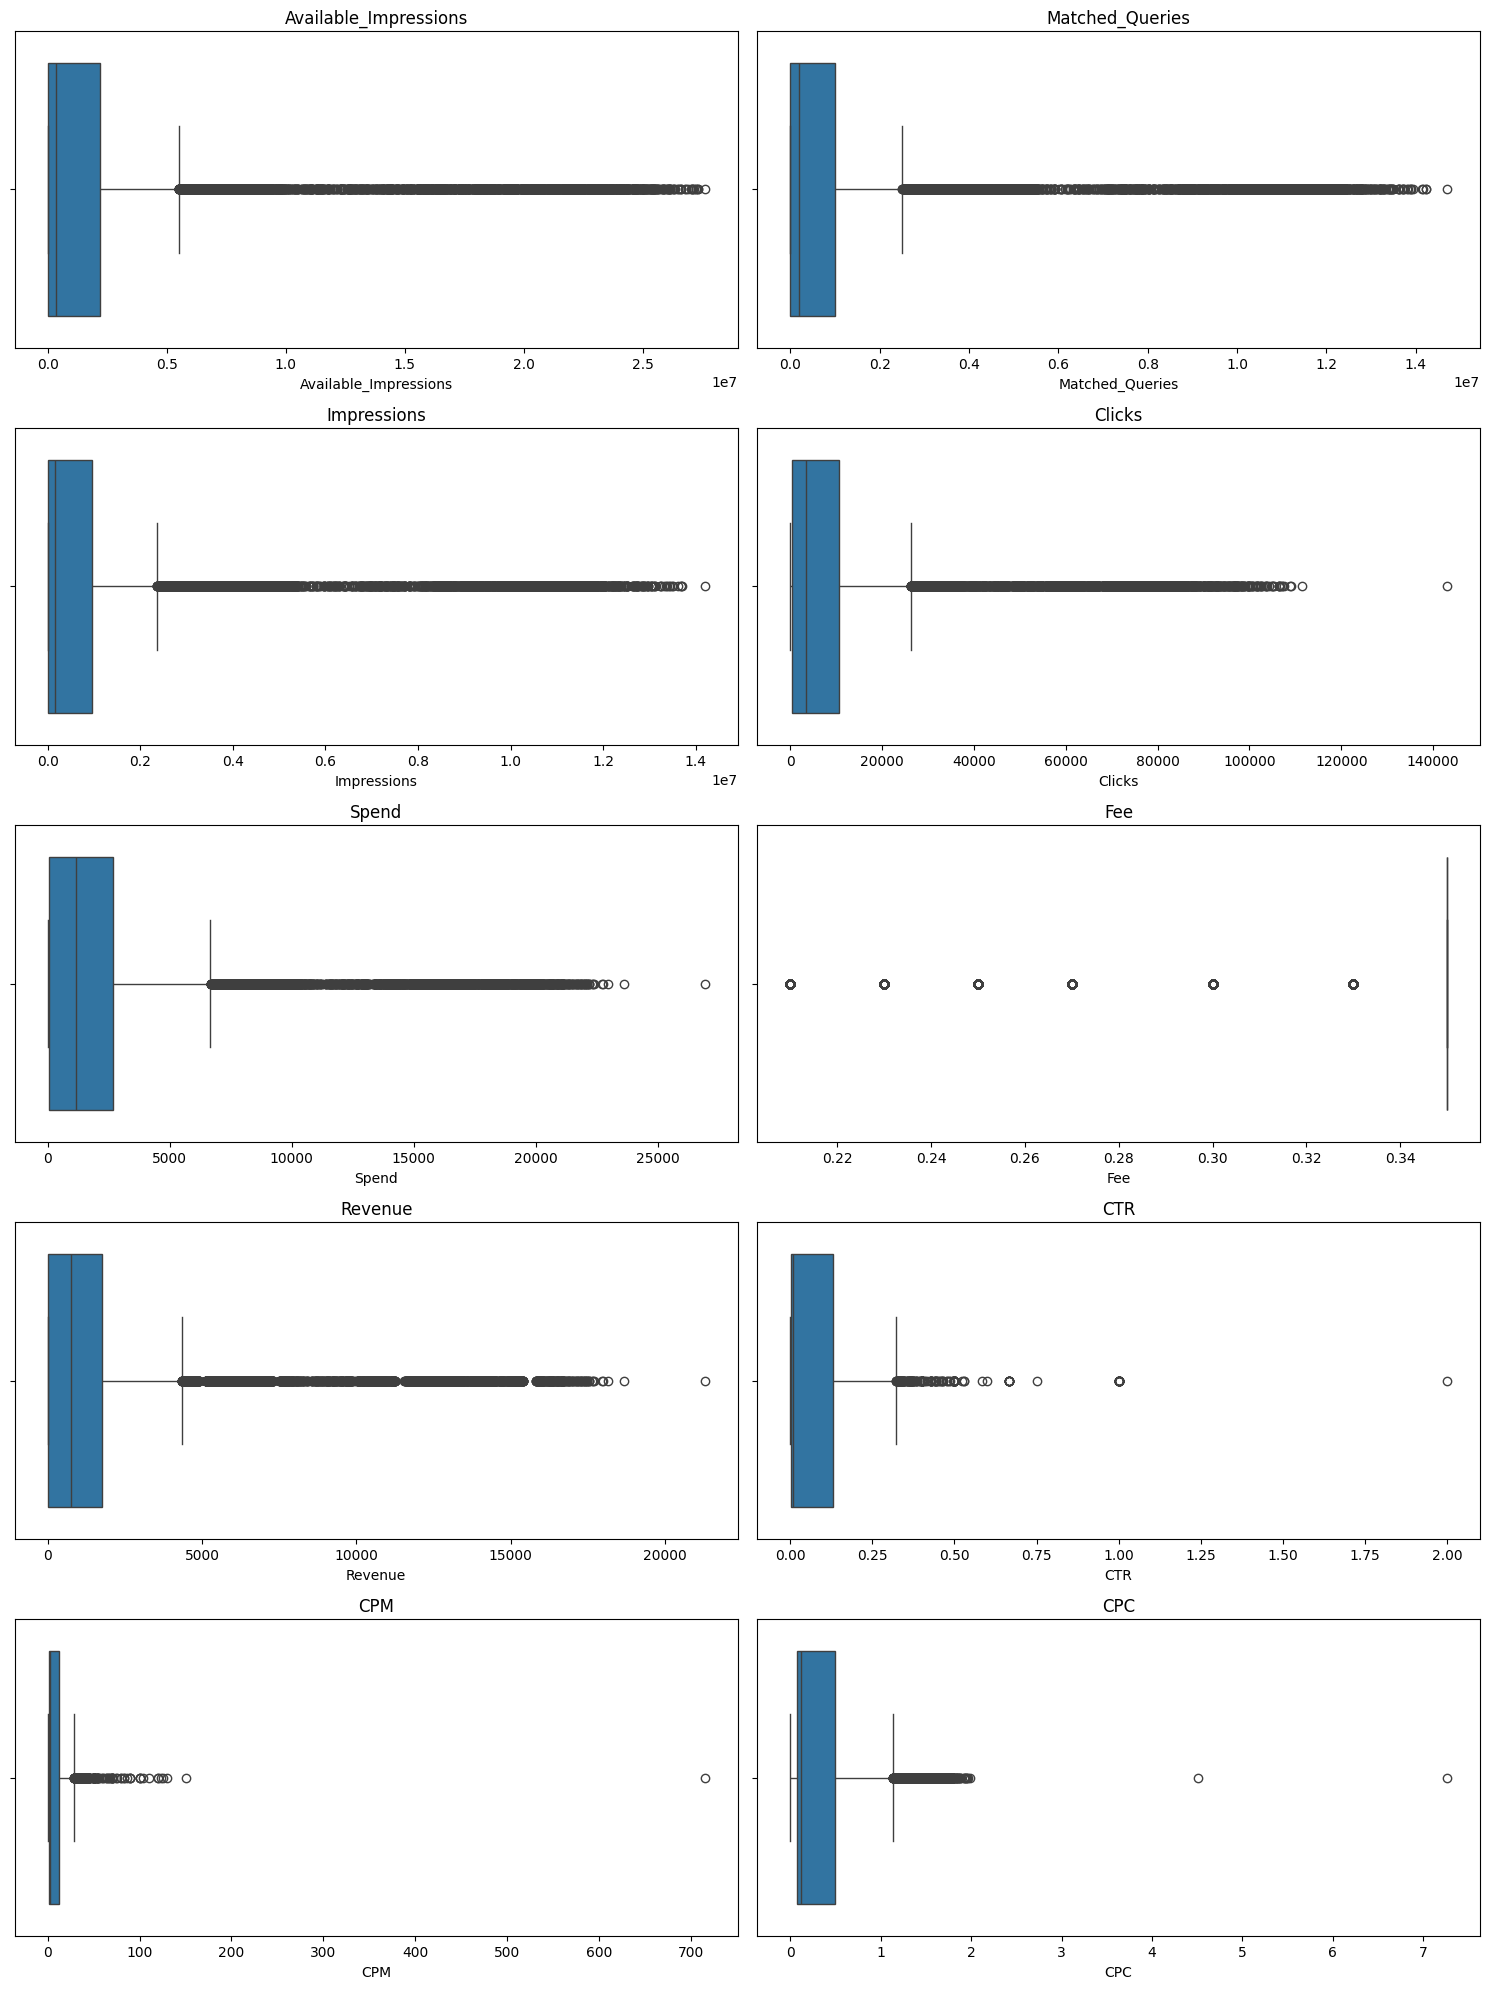

In [21]:
# Visualizando distribuição das variáveis quantitativas - boxplot

colunas_numericas = df_1_quantitative.columns

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
for n, variaveis in enumerate(colunas_numericas):
    sns.boxplot(x=df_1_quantitative[variaveis], ax=axes[n//2, n%2])
    axes[n//2, n%2].set_title(variaveis)

plt.tight_layout()
plt.show()

Abaixo podemos observar:
- A maior parte das distribuições das variáveis quantitativas se aproxima de uma destribuição uniforme
- Os outliers parecem ter um padrão e também parecem estar em destribuição uniforme, porém em quantidades menores é menos visível

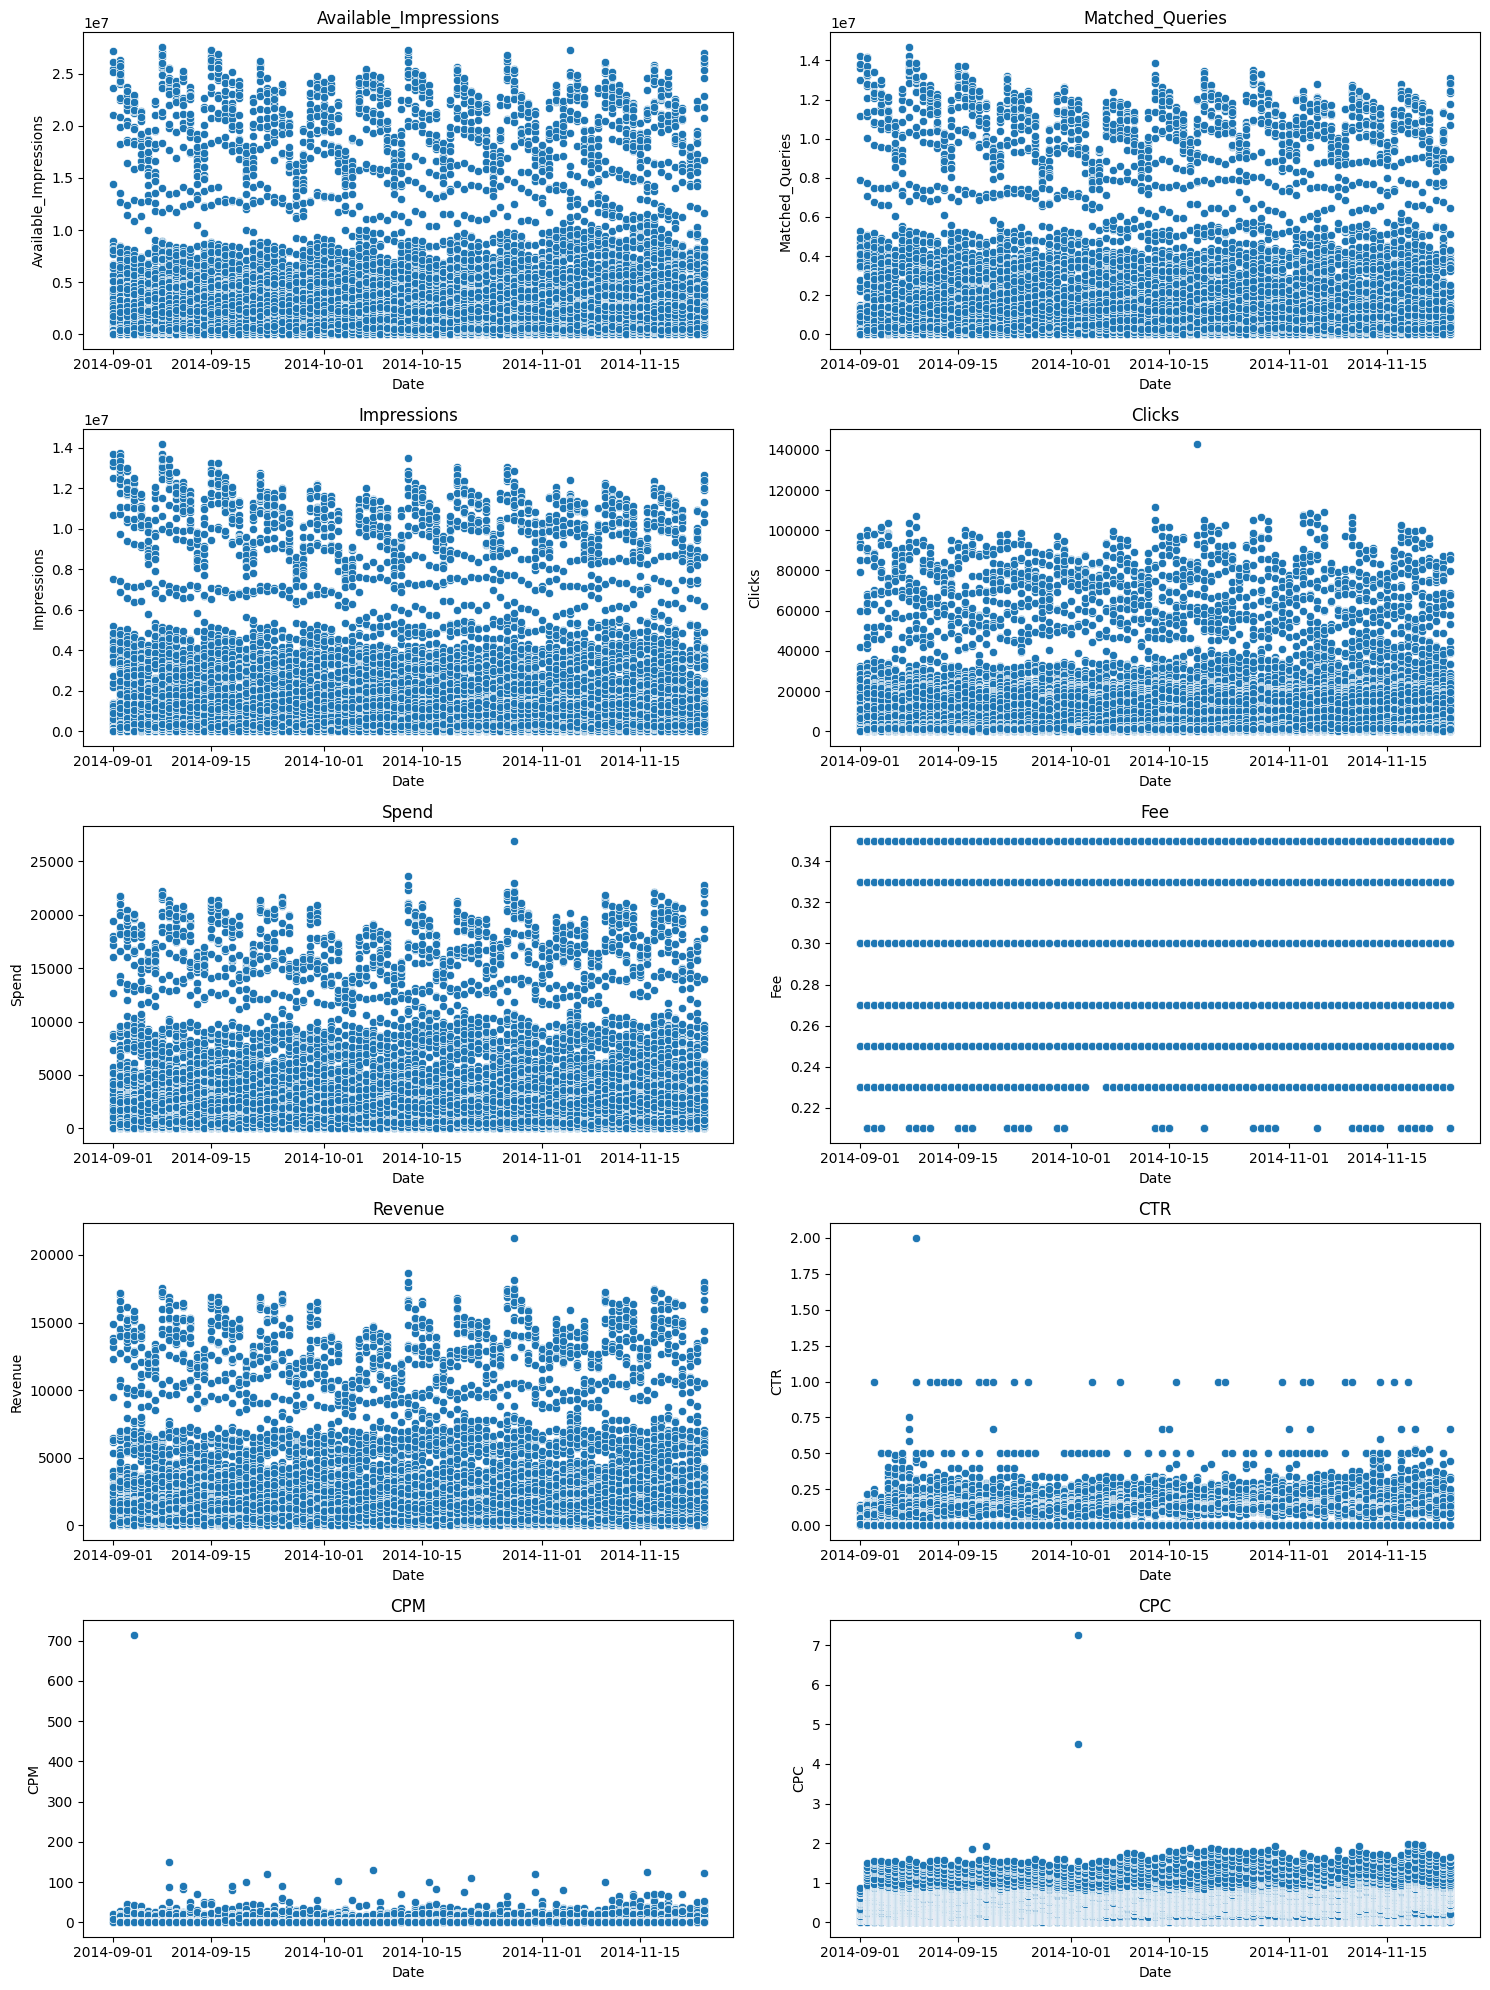

In [22]:
#visualizando distribuição das variáveis quantitativas - Scatter plot

colunas_numericas = df_1_quantitative.columns

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
for n, variaveis in enumerate(colunas_numericas):
    sns.scatterplot(x= df_1["Date"], y=df_1[variaveis], ax=axes[n//2, n%2])
    axes[n//2, n%2].set_title(variaveis)

plt.tight_layout()
plt.show()

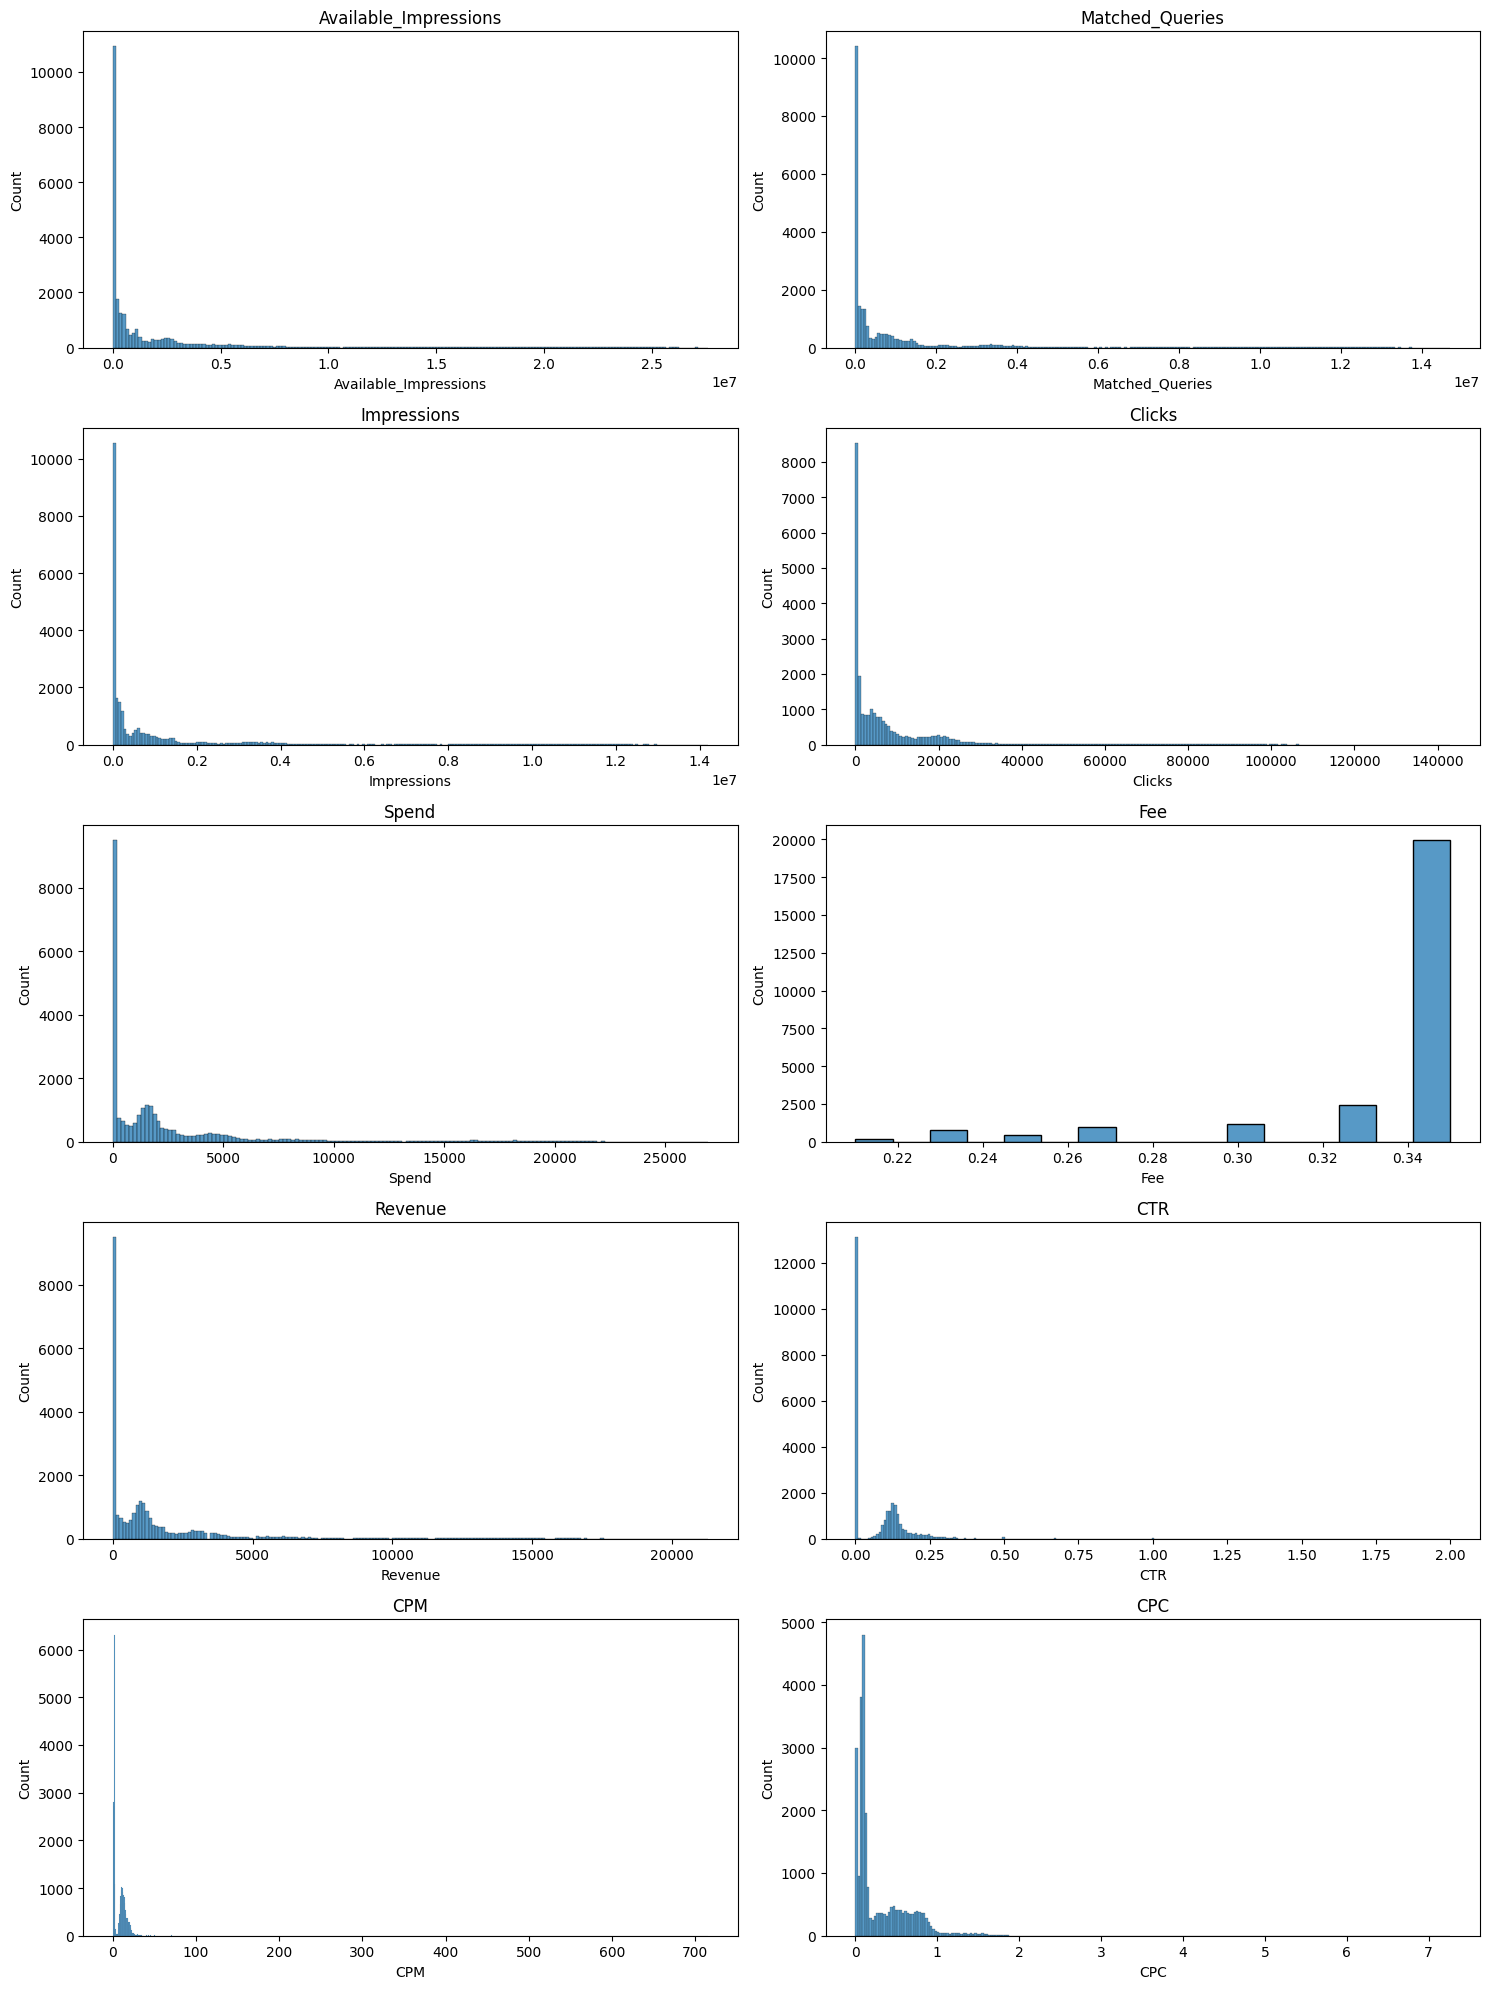

In [23]:
#visualizando distribuição das variáveis quantitativas - Histogram

colunas_numericas = df_1_quantitative.columns

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
for n, variaveis in enumerate(colunas_numericas):
    sns.histplot(x=df_1[variaveis], ax=axes[n//2, n%2])
    axes[n//2, n%2].set_title(variaveis)

plt.tight_layout()
plt.show()

Standardization/Z-score

In [24]:
cols = list(df_1_quantitative.columns)
cols

['Available_Impressions',
 'Matched_Queries',
 'Impressions',
 'Clicks',
 'Spend',
 'Fee',
 'Revenue',
 'CTR',
 'CPM',
 'CPC']

In [25]:
df_1_quantitative[cols] = df_1_quantitative[cols].apply(zscore)
df_1_quantitative

,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.477215,-0.479811,-0.475890,-0.569718,-0.613889,0.434599,-0.573486,-0.821800,-0.842802,-0.886474
1,-0.477198,-0.479816,-0.475894,-0.569718,-0.613889,0.434599,-0.573486,-0.821800,-0.842802,-0.886474
2,-0.477113,-0.479770,-0.475849,-0.569718,-0.613889,0.434599,-0.573486,-0.821800,-0.842802,-0.886474
3,-0.477144,-0.479807,-0.475886,-0.569718,-0.613889,0.434599,-0.573486,-0.821800,-0.842802,-0.886474
4,-0.477036,-0.479803,-0.475881,-0.569658,-0.613889,0.434599,-0.573486,-0.790942,-0.842802,-0.886474
...,...,...,...,...,...,...,...,...,...,...
25853,0.351033,0.432452,0.414937,-0.420148,0.357642,-0.220155,0.281815,-0.808587,-0.636345,3.623999
25854,0.475069,0.560914,0.542836,-0.368178,0.695278,-1.202286,0.630665,-0.806231,-0.599518,3.624231
25855,0.110323,0.150468,0.134073,-0.480131,0.009393,0.434599,-0.041150,-0.810243,-0.649375,3.944694
25856,0.062553,0.099535,0.087289,-0.476184,0.042470,0.434599,-0.012900,-0.808732,-0.622194,3.986386


"""3 - means that 99.7% of the data is saved 2 - means that 95.44% of the data is saved 1 - means that 68.26% of the data is saved"""

In [26]:
outliers_threshold = 1

selected_dada = df_1_quantitative[cols].abs() <= outliers_threshold

not_selected_dada = ~(selected_dada)

In [27]:
selected_dada

,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
25853,True,True,True,True,True,True,True,True,True,False
25854,True,True,True,True,True,False,True,True,True,False
25855,True,True,True,True,True,True,True,True,True,False
25856,True,True,True,True,True,True,True,True,True,False


In [28]:
not_selected_dada

,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
25853,False,False,False,False,False,False,False,False,False,True
25854,False,False,False,False,False,True,False,False,False,True
25855,False,False,False,False,False,False,False,False,False,True
25856,False,False,False,False,False,False,False,False,False,True


In [29]:
mask = (selected_dada).all(axis=1)
mask

0         True
1         True
2         True
3         True
4         True
         ...  
25853    False
25854    False
25855    False
25856    False
25857    False
Length: 25858, dtype: bool

In [30]:

df_1 = df_1[mask]

In [31]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14361 entries, 0 to 25797
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Timestamp              14361 non-null  object        
 1   Date                   14361 non-null  datetime64[ns]
 2   Hour_of_Day            14361 non-null  int64         
 3   Date_1                 14361 non-null  object        
 4   InventoryType          14361 non-null  object        
 5   AD_Size                14361 non-null  object        
 6   Ad_Type                14361 non-null  object        
 7   Platform               14361 non-null  object        
 8   Device_Type            14361 non-null  object        
 9   Format                 14361 non-null  object        
 10  Available_Impressions  14361 non-null  int64         
 11  Matched_Queries        14361 non-null  int64         
 12  Impressions            14361 non-null  int64         
 13  Clicks

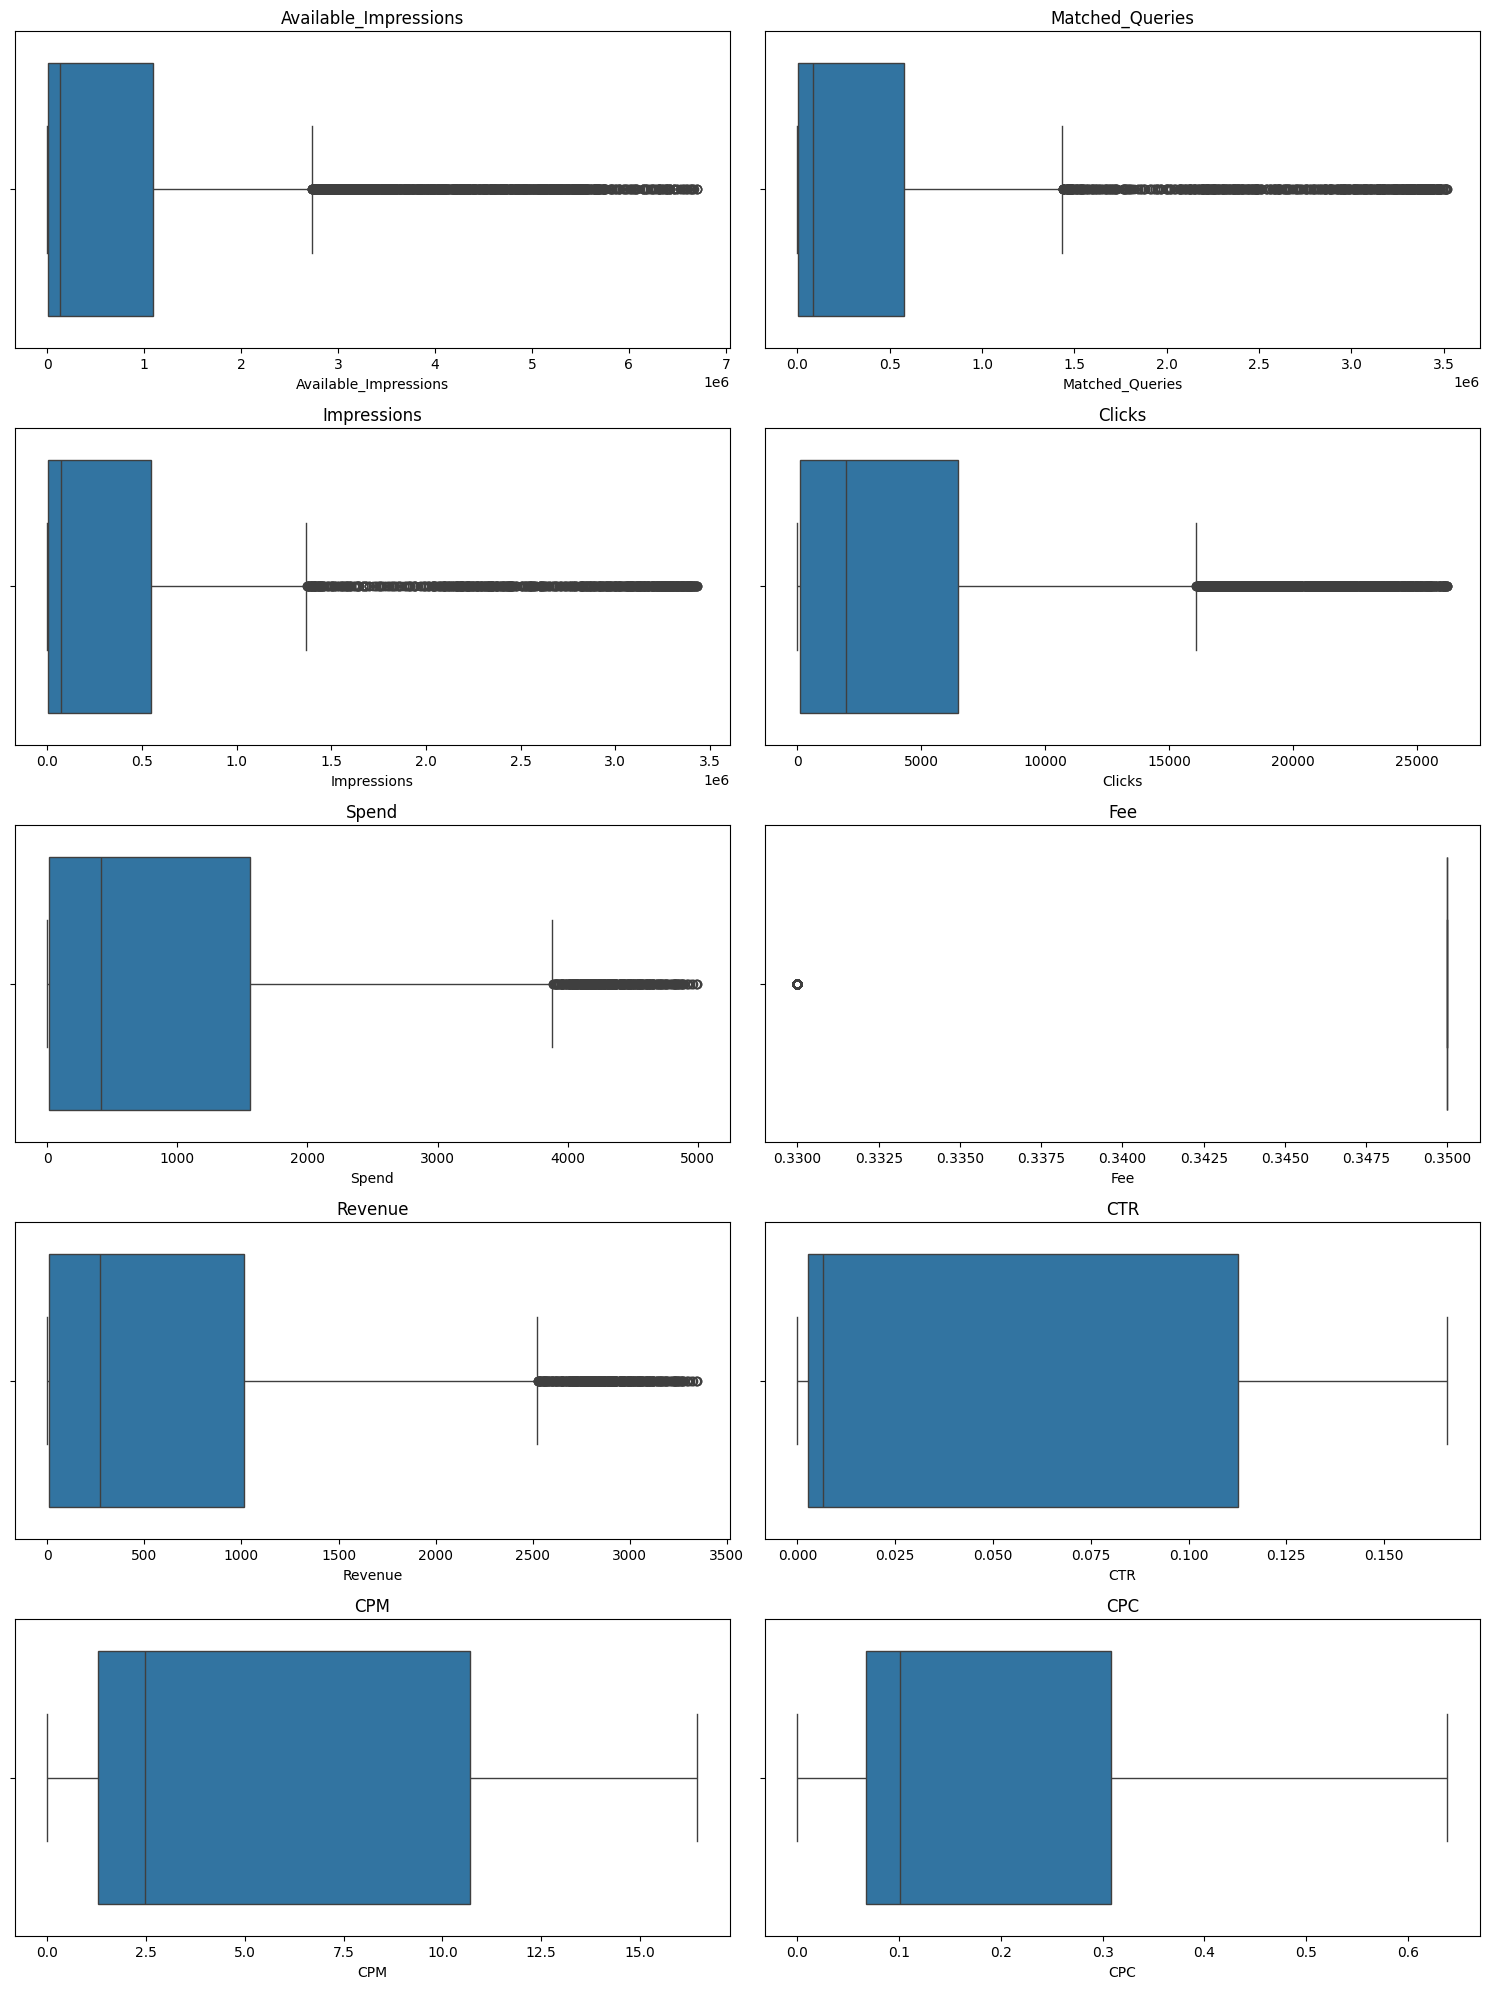

In [32]:
#visualizando distribuição das variáveis quantitativas - boxplot

colunas_numericas = df_1_quantitative.columns

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
for n, variaveis in enumerate(colunas_numericas):
    sns.boxplot(x=df_1[variaveis], ax=axes[n//2, n%2])
    axes[n//2, n%2].set_title(variaveis)

plt.tight_layout()
plt.show()

Collinearity

In [33]:
# Criando uma cópia do Dataframe

df_2 = df_1.copy()

# Excluindo as colunas: Timestamp, InventoryType, Ad_Type e Ad_Size

colunas_excluidas = ["Timestamp", "InventoryType", "Ad_Type", "AD_Size"]
df_2.drop(colunas_excluidas, axis=1, inplace=True)

# Visualizando as três primeiras linhas

df_2.head(3)

,Date,Hour_of_Day,Date_1,Platform,Device_Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Month
0,2014-09-01,23,Monday,Video,Mobile,Video,1911,336,334,0,0.0,0.35,0.0,0.0,0.0,0.0,9
1,2014-09-01,18,Monday,App,Mobile,Display,1987,325,324,0,0.0,0.35,0.0,0.0,0.0,0.0,9
2,2014-09-01,17,Monday,Video,Desktop,Display,2375,434,428,0,0.0,0.35,0.0,0.0,0.0,0.0,9


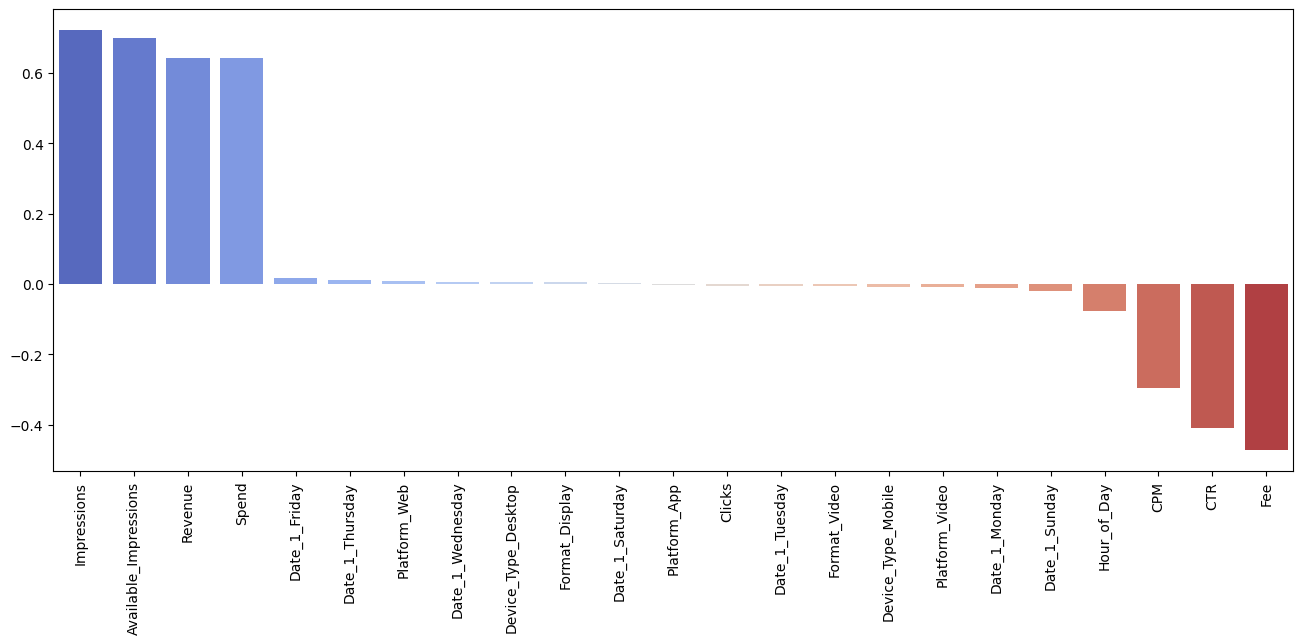

In [34]:
# Criação de dummies e análise de correlação com 'CPC'

dummies = pd.get_dummies(df_2[[ 'Hour_of_Day', 'Date_1',
       'Platform', 'Device_Type', 'Format',
       'Available_Impressions', 'Impressions', 'Clicks',
       'Spend', 'Fee', 'Revenue', 'CTR', 'CPM', 'CPC']])
teste = dummies.corr()['CPC'].sort_values(ascending=False)[1:]

# Visulização da correlação 

fig, ax = plt.subplots(figsize= (16, 6))
sns.barplot(x=teste.index, y=teste.values, palette='coolwarm')
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('')

plt.show()

In [35]:
# Pearson correlation coefficient
# The range for a correlation coefficient is between -1 and 1
# Typically, we say that two variables are correlated if 
# their correlation coefficient is greater than 0.5, or less than -0.5.
corr = df_1_quantitative.corr()
print("Correlation Coefficients")
print(corr)

Correlation Coefficients
                       Available_Impressions  Matched_Queries  Impressions  \
Available_Impressions               1.000000         0.995055     0.994960   
Matched_Queries                     0.995055         1.000000     0.999923   
Impressions                         0.994960         0.999923     1.000000   
Clicks                              0.135481         0.148232     0.140750   
Spend                               0.894798         0.907152     0.903872   
Fee                                -0.819397        -0.836872    -0.833097   
Revenue                             0.899322         0.910845     0.907536   
CTR                                -0.348244        -0.344413    -0.346365   
CPM                                -0.288243        -0.282856    -0.284969   
CPC                                 0.579097         0.594581     0.595932   

                         Clicks     Spend       Fee   Revenue       CTR  \
Available_Impressions  0.135481  0.894798

In [36]:
# Spearman's Rank correlation coefficient
# Measures the monotonic relation between a pair of variables
# their correlation coefficient is greater than 0.5, or less than -0.5.

corr = df_1_quantitative.corr(method="spearman")
print(corr)

                       Available_Impressions  Matched_Queries  Impressions  \
Available_Impressions               1.000000         0.996524     0.995873   
Matched_Queries                     0.996524         1.000000     0.999284   
Impressions                         0.995873         0.999284     1.000000   
Clicks                              0.714424         0.724453     0.719515   
Spend                               0.909054         0.925877     0.922558   
Fee                                -0.622036        -0.640409    -0.635072   
Revenue                             0.909054         0.925877     0.922558   
CTR                                -0.307358        -0.291870    -0.293730   
CPM                                -0.292942        -0.263795    -0.268332   
CPC                                 0.812835         0.823897     0.825781   

                         Clicks     Spend       Fee   Revenue       CTR  \
Available_Impressions  0.714424  0.909054 -0.622036  0.909054 -0.3

In [37]:
# Visualizando as três primeiras linhas

df_2.head()

,Date,Hour_of_Day,Date_1,Platform,Device_Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Month
0,2014-09-01,23,Monday,Video,Mobile,Video,1911,336,334,0,0.0,0.35,0.0,0.000000,0.0,0.0,9
1,2014-09-01,18,Monday,App,Mobile,Display,1987,325,324,0,0.0,0.35,0.0,0.000000,0.0,0.0,9
2,2014-09-01,17,Monday,Video,Desktop,Display,2375,434,428,0,0.0,0.35,0.0,0.000000,0.0,0.0,9
3,2014-09-01,20,Monday,App,Mobile,Display,2235,345,342,0,0.0,0.35,0.0,0.000000,0.0,0.0,9
4,2014-09-01,22,Monday,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.002817,0.0,0.0,9


#### Etapa 3. Perguntas de negócio

##### Qual plataforma teve mais impressões?

In [38]:
# Tabela com o total de Impressions por Platform
impressions_por_platform = df_2.groupby('Platform')['Impressions'].sum().reset_index()

# Ordena o DataFrame por 'Impressions' do maior para o menor
impressions_por_platform = impressions_por_platform.sort_values(by='Impressions', ascending=False)

print(impressions_por_platform)

  Platform  Impressions
1    Video   2313894832
2      Web   1942853675
0      App   1152134600


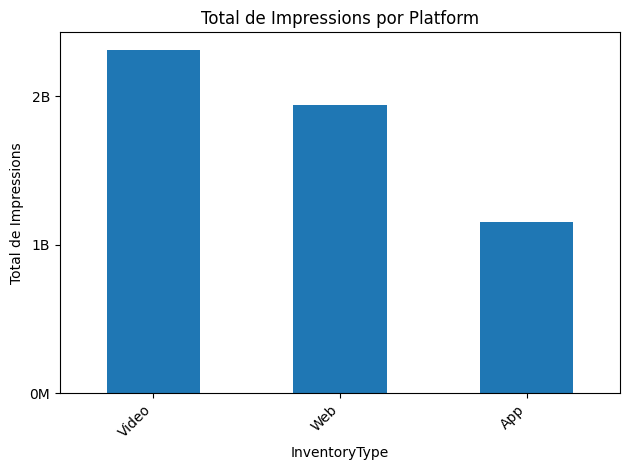

In [87]:
# Criação do gráfico de barras
ax = impressions_por_platform.plot(kind='bar', x='Platform', y='Impressions', legend=False, title='Total de Impressions por Platform', xlabel='InventoryType', ylabel='Total de Impressions')

# Formatação dos números para a casa dos bilhões
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.0f}B".format(x/1000000000) if x >= 1000000000 else "{:,.0f}M".format(x/1000000)))

# Configuração da escala do eixo y com intervalo de 1
ax.set_yticks(range(0, int(impressions_por_platform['Impressions'].max()) + 1, 1000000000))

# Inclinação da legenda do eixo x
plt.xticks(rotation=45, ha='right')

# Ajuste automático do layout
plt.tight_layout()

# Salvar o gráfico em um arquivo PNG na subpasta "Imagens"
plt.savefig('Imagens/output1.png')

plt.show()

In [40]:
# Tabela com o total de Impressions por InventoryType e Format
agg_df = df_1.groupby(['Platform', 'Format'])['Impressions'].sum().unstack(fill_value=0)

# Ordena as colunas por 'Format' do maior para o menor
agg_df = agg_df.sort_values(by='Video', ascending=False)

print(agg_df)

Format       Display       Video
Platform                        
Video     1179862744  1134032088
Web        949497945   993355730
App        604453554   547681046


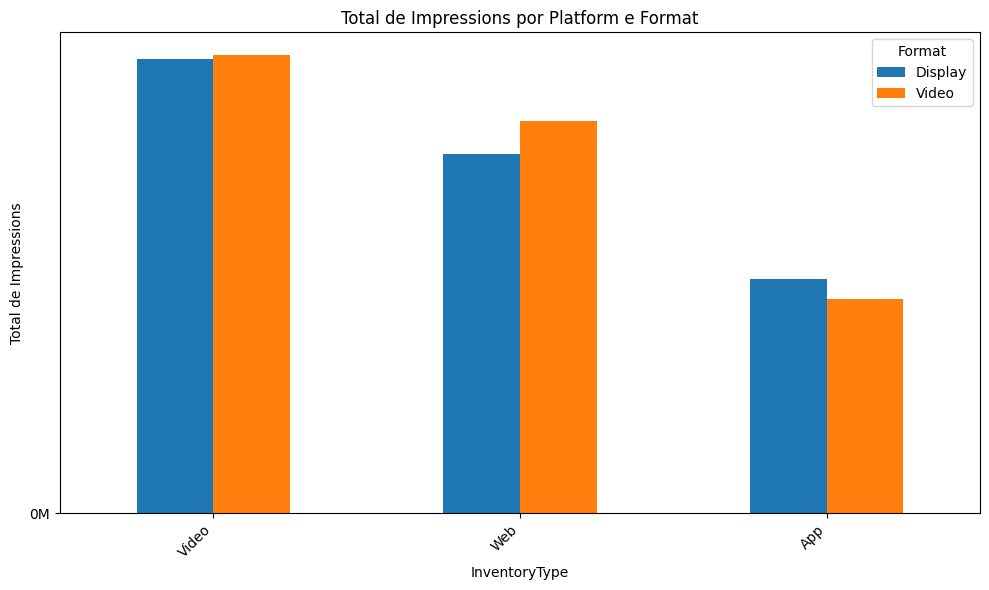

In [88]:
# Criação do gráfico de barras agrupadas
ax = agg_df.plot(kind='bar', stacked=False, figsize=(10, 6), title='Total de Impressions por Platform e Format', xlabel='InventoryType', ylabel='Total de Impressions')

# Ajuste da escala do eixo y com intervalo de 500M
max_value = agg_df.max().max()
ax.set_yticks(range(0, int(max_value) + 1, 500000000))

# Formatação dos números para a casa dos bilhões
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.0f}B".format(x/1000000000) if x >= 1000000000 else "{:,.0f}M".format(x/1000000)))

# Inclinação da legenda do eixo x
plt.xticks(rotation=45, ha='right')

# Ajuste automático do layout
plt.tight_layout()

# Salvar o gráfico em um arquivo PNG na subpasta "Imagens"
plt.savefig('Imagens/output2.png')

plt.show()

##### Qual formato teve maior quantidade de clicks?

In [42]:
# Tabela com o total de Clicks por Format
clicks_por_format = df_2.groupby('Format')['Clicks'].sum().reset_index()

# Ordena o DataFrame por 'Clicks' do maior para o menor
clicks_por_format = clicks_por_format.sort_values(by='Clicks', ascending=False)

print(clicks_por_format)

    Format    Clicks
1    Video  35141965
0  Display  34579883


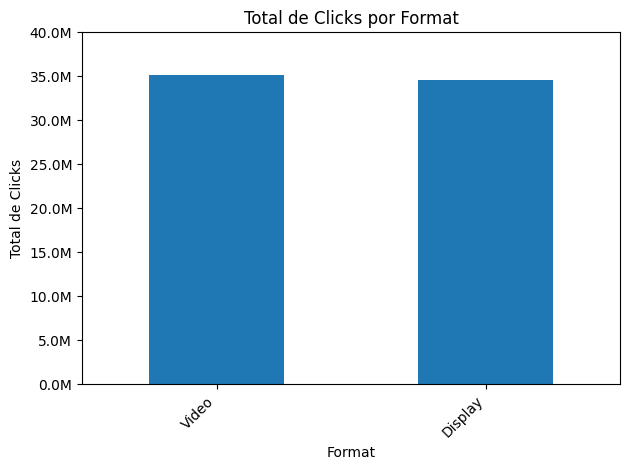

In [89]:
# Criação do gráfico de barras
ax = clicks_por_format.plot(kind='bar', x='Format', y='Clicks', legend=False,
                             title='Total de Clicks por Format', 
                             xlabel='Format', 
                             ylabel='Total de Clicks')

# Formatação dos números para a casa dos milhões
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)/1000000) + "M"))

# Ajuste da escala do eixo y para um intervalo de 0 a 40M
ax.set_ylim(0, 40000000)

# Inclinação da legenda do eixo x
plt.xticks(rotation=45, ha='right')

# Ajuste automático do layout
plt.tight_layout()

# Salvar o gráfico em um arquivo PNG na subpasta "Imagens"
plt.savefig('Imagens/output3.png')

plt.show()

In [44]:
# Tabela com o total de Clicks por InventoryType e Format
agg_df = df_2.groupby(['Platform', 'Format'])['Clicks'].sum().unstack(fill_value=0)

# Ordena as colunas por 'Format' do maior para o menor
agg_df = agg_df.sort_values(by='Video', ascending=False)

print(agg_df)

Format     Display     Video
Platform                    
Video     14986952  15112258
Web       11858230  12954313
App        7734701   7075394


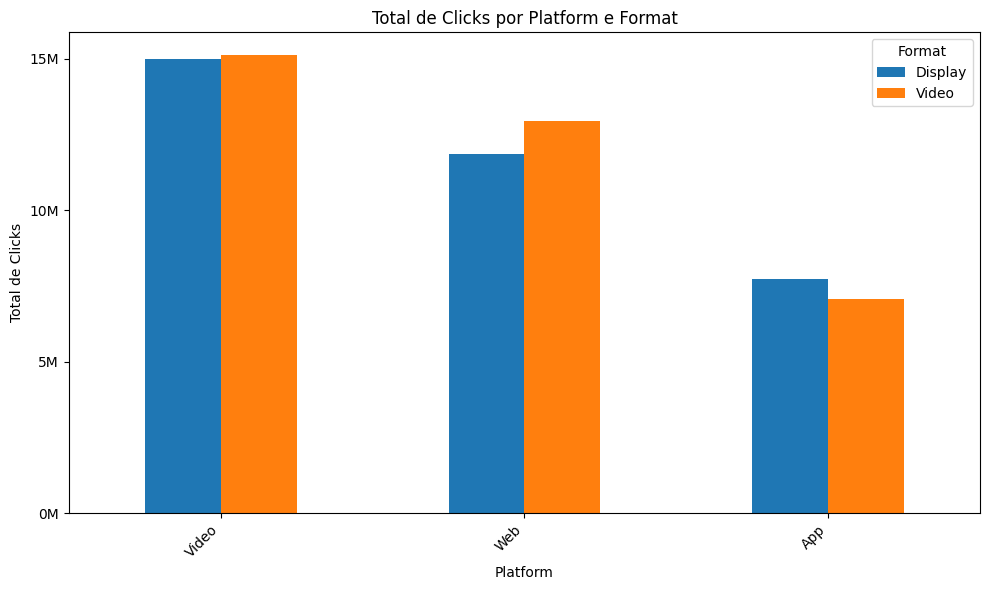

In [90]:
# Criação do gráfico de barras agrupadas
ax = agg_df.plot(kind='bar', stacked=False, figsize=(10, 6), title='Total de Clicks por Platform e Format', xlabel='Platform', ylabel='Total de Clicks')

# Ajuste da escala do eixo y com intervalo de 5M
max_value = agg_df.max().max()
ax.set_yticks(range(0, int(max_value) + 1, 5000000))

# Formatação dos números para a casa dos milhões
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.0f}M".format(x/1000000)))

# Inclinação da legenda do eixo x
plt.xticks(rotation=45, ha='right')

# Ajuste automático do layout
plt.tight_layout()

# Salvar o gráfico em um arquivo PNG na subpasta "Imagens"
plt.savefig('Imagens/output4.png')

plt.show()

Acima podemos observar:
- Vídeo é a melhor plataforma tanto relação formato vídeo quanto o formato display, mas a frente iremos investigar se isto também ocorre em relação ao CPC. 
- App é a única plataforma que display é melhor que vídeo. 

##### Qual a melhor plataforma em relação ao CPC?

In [46]:
# Tabela com a média de CPC por plataforma
cpc_por_plataforma = df_2.groupby('Platform')['CPC'].mean().reset_index()

# Ordena o DataFrame por 'CPC' do menor para o maior
cpc_por_plataforma = cpc_por_plataforma.sort_values(by='CPC', ascending=True)

print(cpc_por_plataforma)

  Platform       CPC
1    Video  0.181693
0      App  0.182655
2      Web  0.185467


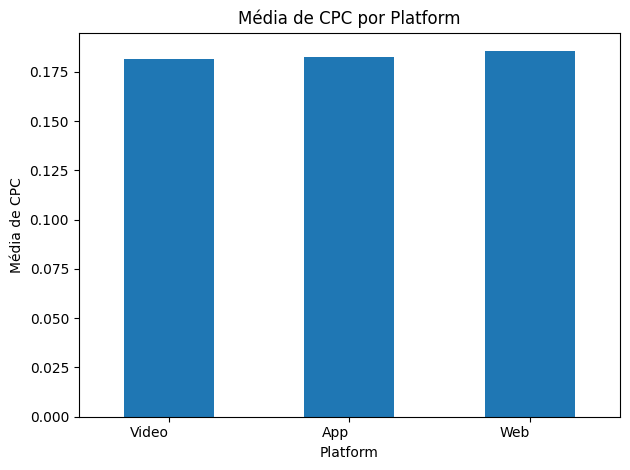

In [91]:
# Criação do gráfico de barras
ax = cpc_por_plataforma.plot(kind='bar', x='Platform', y='CPC', legend=False,
                          title='Média de CPC por Platform', 
                        
                          ylabel='Média de CPC')

# Inclinação da legenda do eixo x
plt.xticks(rotation=360, ha='right')

# Ajuste automático do layout
plt.tight_layout()

# Salvar o gráfico em um arquivo PNG na subpasta "Imagens"
plt.savefig('Imagens/output5.png')

plt.show()

Acima podemos observar:
- Apesar do vídeo apresentar impressões e clicks superiores, o custo por click é muito próximo entre as plataformas

##### Qual o melhor formato em relação ao CPC?


In [48]:
# Tabela com a média de CPC por Format
cpc_por_formato = df_2.groupby('Format')['CPC'].mean().reset_index()

# Ordena o DataFrame por 'CPC' do menor para o maior
cpc_por_formato = cpc_por_formato.sort_values(by='CPC', ascending=True)

print(cpc_por_formato)

    Format       CPC
1    Video  0.182217
0  Display  0.184286


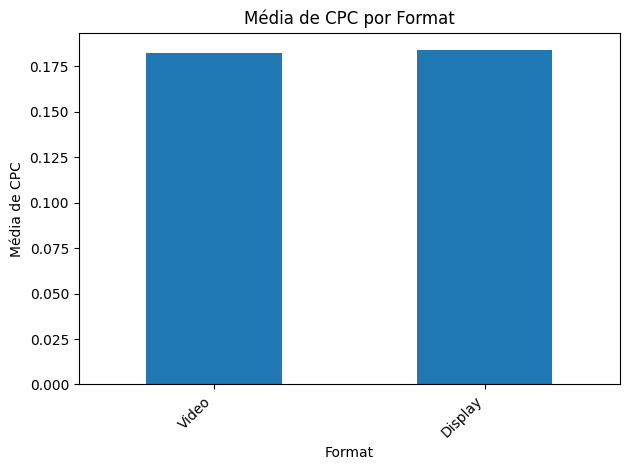

In [92]:
# Criação do gráfico de barras
ax = cpc_por_formato.plot(kind='bar', x='Format', y='CPC', legend=False,
                          title='Média de CPC por Format', 
                          xlabel='Format', 
                          ylabel='Média de CPC')

# Inclinação da legenda do eixo x
plt.xticks(rotation=45, ha='right')

# Ajuste automático do layout
plt.tight_layout()

# Salvar o gráfico em um arquivo PNG na subpasta "Imagens"
plt.savefig('Imagens/output6.png')

plt.show()

##### Qual o melhor dia da semana em relação ao CPC?

In [50]:
# Tabela com a média de CPC por dia da semana
cpc_dia_semana = df_2.groupby('Date_1')['CPC'].mean().reset_index()

# Ordena o DataFrame por 'CPC' do menor para o maior
cpc_dia_semana = cpc_dia_semana.sort_values(by='CPC', ascending=True)

print(cpc_dia_semana)

      Date_1       CPC
3     Sunday  0.174924
1     Monday  0.177752
5    Tuesday  0.180772
2   Saturday  0.184358
6  Wednesday  0.186542
4   Thursday  0.188382
0     Friday  0.190632


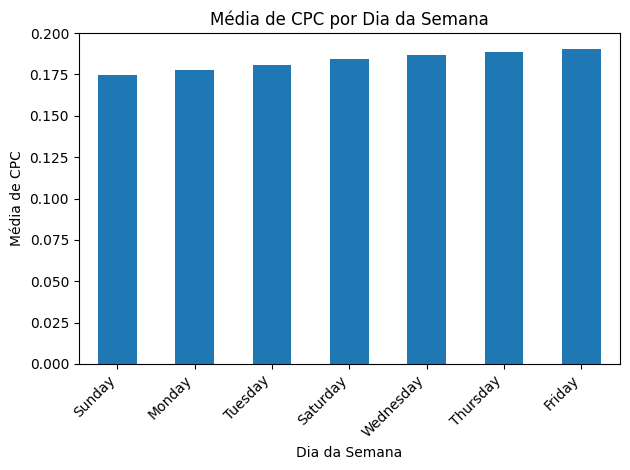

In [93]:
# Criação do gráfico de barras
ax = cpc_dia_semana.plot(kind='bar', x='Date_1', y='CPC', legend=False,
                             title='Média de CPC por Dia da Semana', 
                             xlabel='Dia da Semana', 
                             ylabel='Média de CPC')

# Inclinação da legenda do eixo x
plt.xticks(rotation=45, ha='right')

# Ajuste automático do layout
plt.tight_layout()

# Salvar o gráfico em um arquivo PNG na subpasta "Imagens"
plt.savefig('Imagens/output7.png')

plt.show()

##### Qual o melhor horário em relação ao CPC?

In [80]:
# Tabela com a média de CPC para cada horário do dia
cpc_horario = df_2.groupby('Hour_of_Day')['CPC'].mean().reset_index()

# Ordena as horas do dia em relação ao menor CPC
cpc_horario = cpc_horario.sort_values(by='Hour_of_Day', ascending=True)

print(cpc_horario)

    Hour_of_Day       CPC
0             0  0.197566
1             1  0.202527
2             2  0.193787
3             3  0.191328
4             4  0.190069
5             5  0.206207
6             6  0.209910
7             7  0.195105
8             8  0.192683
9             9  0.189887
10           10  0.184307
11           11  0.185622
12           12  0.186735
13           13  0.184168
14           14  0.188370
15           15  0.187761
16           16  0.180644
17           17  0.181785
18           18  0.191526
19           19  0.186214
20           20  0.150269
21           21  0.134816
22           22  0.135580
23           23  0.163221


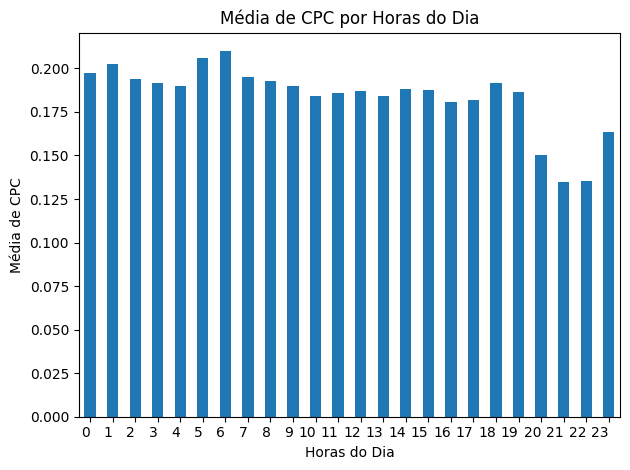

In [94]:
# Criação do gráfico de barras
ax = cpc_horario.plot(kind='bar', x='Hour_of_Day', y='CPC', legend=False,
                             title='Média de CPC por Horas do Dia', 
                             xlabel='Horas do Dia', 
                             ylabel='Média de CPC')

# Inclinação da legenda do eixo x
plt.xticks(rotation=0, ha='right')

# Ajuste automático do layout
plt.tight_layout()

# Salvar o gráfico em um arquivo PNG na subpasta "Imagens"
plt.savefig('Imagens/output8.png')

plt.show()

##### Qual foi a variação do custo por click?

In [54]:
# Calcula a variação do CPC
cpc_variacao = df_2['CPC'].diff()

# Substitui por zero o valor Nan da primeira linha do dataframe
cpc_variacao.iloc[0] = 0

print(cpc_variacao)

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
25792    0.001479
25793    0.005928
25794    0.001622
25796    0.014143
25797    0.028176
Name: CPC, Length: 14361, dtype: float64


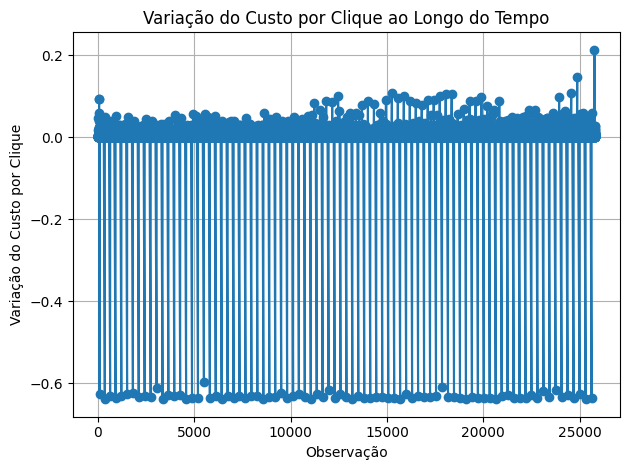

In [95]:
# Plota o gráfico de linha com a variacao do CPC
plt.plot(cpc_variacao.index, cpc_variacao, marker='o')
plt.xlabel('Observação')
plt.ylabel('Variação do Custo por Clique')
plt.title('Variação do Custo por Clique ao Longo do Tempo')
plt.grid(True)

# Ajuste automático do layout
plt.tight_layout()

# Salvar o gráfico em um arquivo PNG na subpasta "Imagens"
plt.savefig('Imagens/output9.png')

plt.show()

In [56]:
# Calcula o desvio padrão do CPC
cpc_desvio_padrao = df_2['CPC'].std()

print(cpc_desvio_padrao)

0.1841939582105851


##### Qual horário tem maior disponibilidade e menor custo?

In [57]:
# Encontrar o horário com a maior disponibilidade
max_disponibilidade = df_2.loc[df_2['Available_Impressions'].idxmax()]['Hour_of_Day']

# Encontrar o horário com o menor custo
min_custo = df_2.loc[df_2['CPC'].idxmin()]['Hour_of_Day']

print(f"Horário com maior disponibilidade: {max_disponibilidade}")
print(f"Horário com menor custo: {min_custo}")


Horário com maior disponibilidade: 21
Horário com menor custo: 23


In [58]:
# Classificar os dados com base na disponibilidade (decrescente) e no custo (crescente)
data_sorted = df_2.sort_values(by=['Available_Impressions', 'CPC'], ascending=[False, True])

# Selecionar a primeira linha
melhor_horario = data_sorted.iloc[0]

# Obter o horário
horario_maior_disponibilidade_menor_custo = melhor_horario['Hour_of_Day']

print("Horário com a maior disponibilidade e o menor custo:", horario_maior_disponibilidade_menor_custo)


Horário com a maior disponibilidade e o menor custo: 21


##### Qual melhor horário em relação ao CPC/Clicks?

In [59]:
clicks_per_hour = df_1.groupby(['Hour_of_Day','Platform'])['Clicks'].sum().unstack(fill_value=0)
clicks_per_hour

Platform,App,Video,Web
Hour_of_Day,,,
0,717206,1537367,970199
1,456661,720014,755904
2,279943,494555,486294
3,203242,306308,283073
4,110703,234424,164984
5,113802,232046,168326
6,291584,584443,418835
7,727914,1278106,1169851
8,655587,1505169,1168490


[]

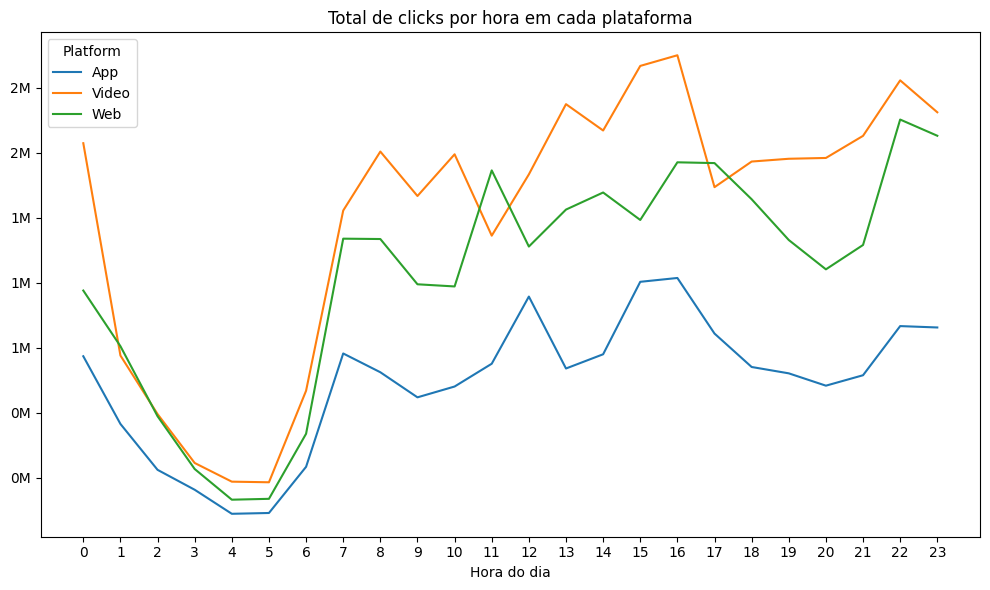

In [96]:
ax = clicks_per_hour.plot(figsize=(10, 6), title='Total de clicks por hora em cada plataforma')
plt.xticks(range(0, 24), rotation=0)
plt.xlabel('Hora do dia')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x*1e-6) + 'M'))

# Ajuste automático do layout
plt.tight_layout()

# Salvar o gráfico em um arquivo PNG na subpasta "Imagens"
plt.savefig('Imagens/output10.png')

plt.plot()

In [61]:
cpc_per_hour = df_1.groupby(['Hour_of_Day','Platform'])['CPC'].mean().unstack(fill_value=0)

[]

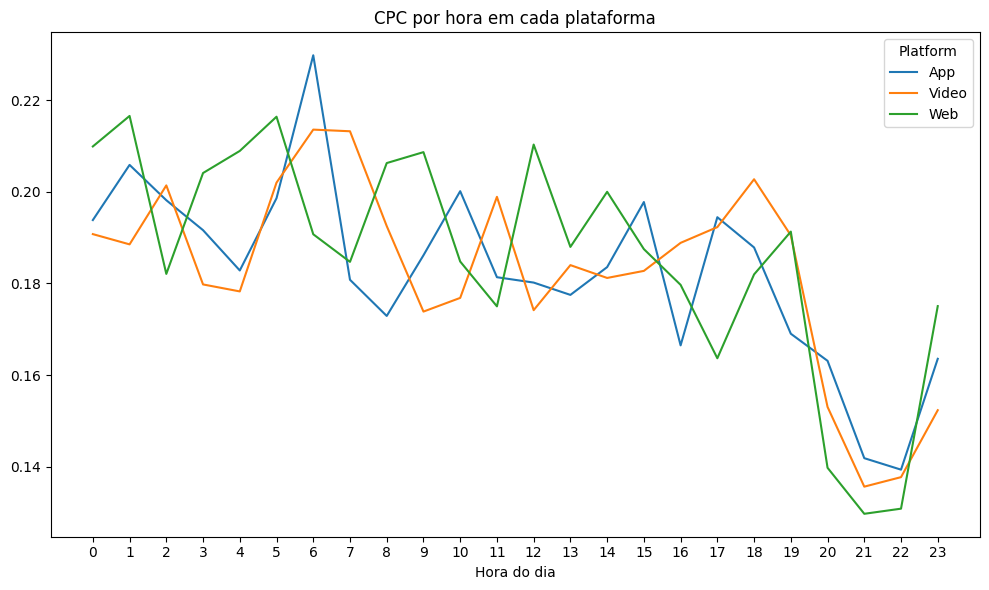

In [97]:
ax = cpc_per_hour.plot(figsize=(10, 6), title='CPC por hora em cada plataforma')
plt.xticks(range(0, 24), rotation=0)
plt.xlabel('Hora do dia')

# Ajuste automático do layout
plt.tight_layout()

# Salvar o gráfico em um arquivo PNG na subpasta "Imagens"
plt.savefig('Imagens/output11.png')

plt.plot()

##### Qual o melhor dia da semana em relação aos Clicks?

In [63]:
clicks_per_day = df_1.groupby('Date_1')['Clicks'].sum()
clicks_per_day

Date_1
Friday        9746350
Monday       10037364
Saturday     10930878
Sunday       11122602
Thursday      8959924
Tuesday       9646383
Wednesday     9278347
Name: Clicks, dtype: int64

[]

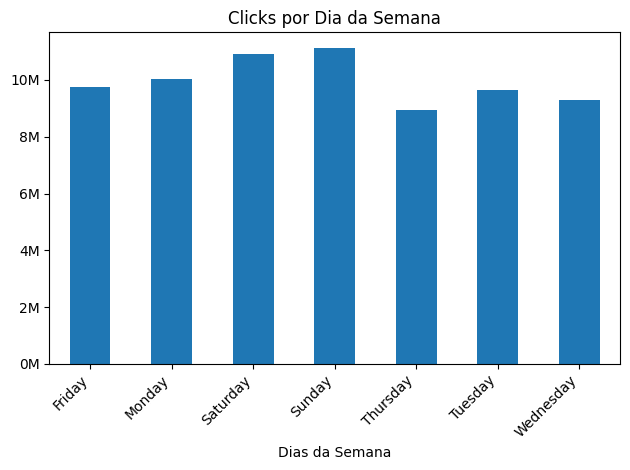

In [100]:
ax = clicks_per_day.plot(kind='bar', title='Clicks por Dia da Semana')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x*1e-6) + 'M'))
plt.xlabel('Dias da Semana')

# Inclinação da legenda do eixo x
plt.xticks(rotation=45, ha='right')

# Ajuste automático do layout
plt.tight_layout()

# Salvar o gráfico em um arquivo PNG na subpasta "Imagens"
plt.savefig('Imagens/output12.png')

plt.plot()